# Perform EDA on the Disaster Dataset

In [28]:
# Package Imports
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
path = r"C:\Users\jaded\Desktop"
os.chdir(path)
sourcefiles = os.listdir(path)
df = pd.read_excel("public_emdat_project.xlsx")

### Display information of the dataset using df.info()

In [3]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15784 entries, 0 to 15783
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   DisNo.                                     15784 non-null  object        
 1   Historic                                   15784 non-null  object        
 2   Classification Key                         15784 non-null  object        
 3   Disaster Group                             15784 non-null  object        
 4   Disaster Subgroup                          15784 non-null  object        
 5   Disaster Type                              15784 non-null  object        
 6   Disaster Subtype                           15784 non-null  object        
 7   External IDs                               2405 non-null   object        
 8   Event Name                                 4955 non-null   object        
 

### Count how many values are present in each column and display those counts

In [4]:
print("Values Present in Each Column")
column_count = df.count()
print(column_count)

Values Present in Each Column
DisNo.                                       15784
Historic                                     15784
Classification Key                           15784
Disaster Group                               15784
Disaster Subgroup                            15784
Disaster Type                                15784
Disaster Subtype                             15784
External IDs                                  2405
Event Name                                    4955
ISO                                          15784
Country                                      15784
Subregion                                    15784
Region                                       15784
Location                                     15136
Origin                                        3955
Associated Types                              3296
OFDA/BHA Response                            15784
Appeal                                       15784
Declaration                                  15784
A

### Print the Summary statistics for the entire data frame

In [5]:
print("Summary Statistics of the Data Frame")
print(df.describe())

Summary Statistics of the Data Frame
       AID Contribution ('000 US$)     Magnitude     Latitude    Longitude  \
count                 4.900000e+02  3.378000e+03  1815.000000  1815.000000   
mean                  2.851070e+04  6.006125e+04    16.464334    42.139949   
min                   3.000000e+00 -5.700000e+01   -72.640000  -172.095000   
25%                   1.660000e+02  7.600000e+00     1.102500     0.859500   
50%                   7.665000e+02  1.900000e+02    18.590000    54.448200   
75%                   4.951000e+03  2.049750e+04    34.816500   103.099000   
max                   3.518530e+06  4.000000e+07    67.930000   179.650000   
std                   2.116816e+05  7.412252e+05    21.776287    75.535413   

         Start Year   Start Month     Start Day      End Year     End Month  \
count  15784.000000  15715.000000  14275.000000  15784.000000  15622.000000   
mean    2010.590155      6.448616     15.361331   2010.621706      6.572782   
min     2000.000000    

### Fill in missing values using the median. Show how many null values are present after handling missing values.

In [6]:
# Missing Values
df_null_count = df.isnull().sum()
# Skipping Unnecessary Columns
skip_cols = ["Latitude", "Longitude", "Start Year", "Start Month", "Start Day", "End Year", "End Month", "End Day"]
# Using .difference to exclude skip_cols
fill_cols = df.columns.difference(skip_cols)
# Using the median to fill columns
df[fill_cols] = df[fill_cols].apply(lambda x:x.fillna(x.median()) if x.dtype in ['float64','int64'] else x)

print('Missing Values After Filling: ')
print(df.isnull().sum())

Missing Values After Filling: 
DisNo.                                           0
Historic                                         0
Classification Key                               0
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                                 0
External IDs                                 13379
Event Name                                   10829
ISO                                              0
Country                                          0
Subregion                                        0
Region                                           0
Location                                       648
Origin                                       11829
Associated Types                             12488
OFDA/BHA Response                                0
Appeal                                           0
Declaration                                      0


# Visualization using PLOTLY Library - Disaster Dataset

### Create a visual that shows disaster counts per year 

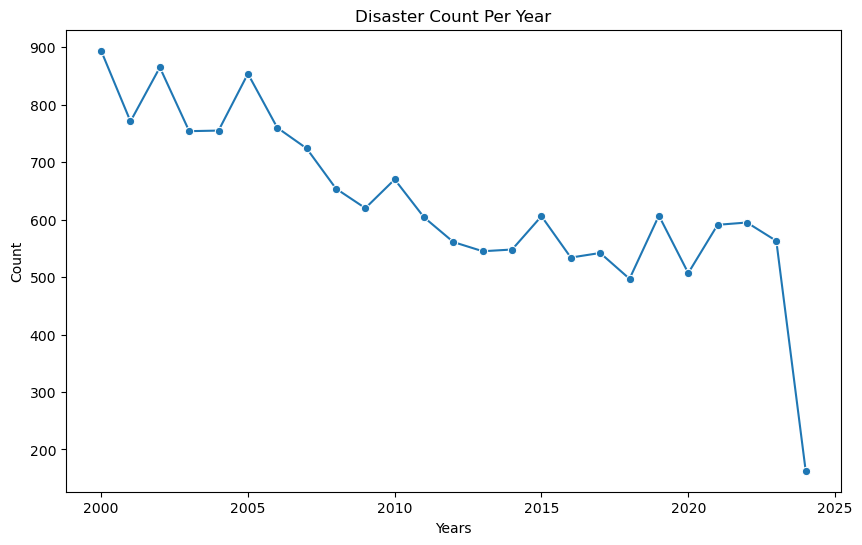

In [7]:
# Converting Start Year Column data type to Pandas Date Time Format
df['Start Year'] = pd.to_datetime(df['Start Year'], format = '%Y')
# Creating Years Column
df['Years'] = df['Start Year'].dt.year
# Grouping Years and Configuring Column for Plotting
disaster_count_year = df.groupby('Years').agg(Count = pd.NamedAgg("Years", "count")).sort_values("Years").reset_index(drop = False)
# Creating Plot
plt.figure(figsize = (10,6))
sns.lineplot(data = disaster_count_year, x = "Years", y = "Count", marker = 'o')
plt.title("Disaster Count Per Year")
plt.show()

### Create a visual that shows the top 10 disasters by total fatalities

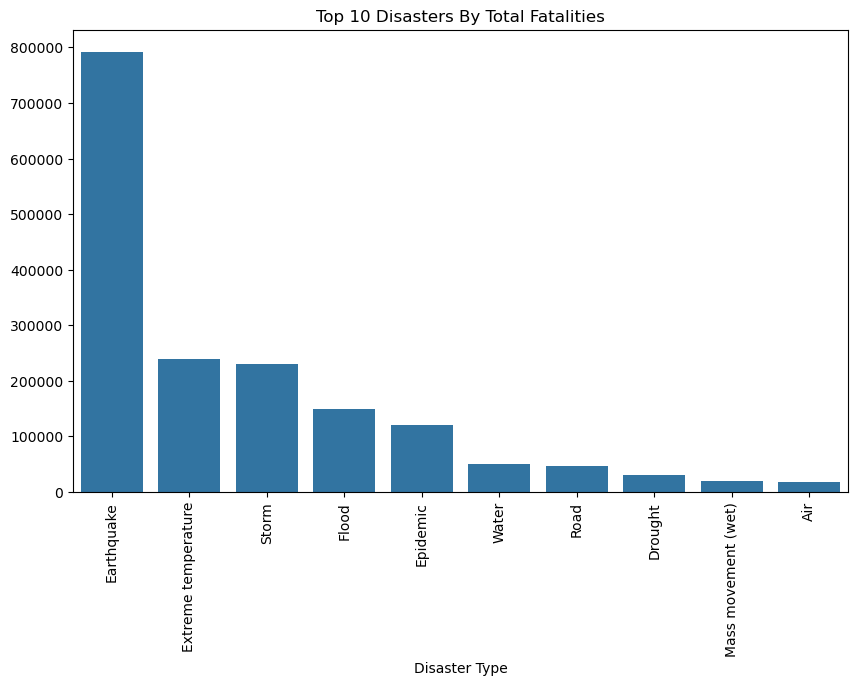

In [8]:
# Grouping Disasters and Total Death
disaster_and_death = df.groupby('Disaster Type')['Total Deaths'].sum().nlargest(10)
plt.figure(figsize = (10,6))
sns.barplot(x = disaster_and_death.index, y = disaster_and_death.values)
plt.title('Top 10 Disasters By Total Fatalities')
plt.xticks(rotation = 90)
plt.show()

### Create a correlation matrix heatmap

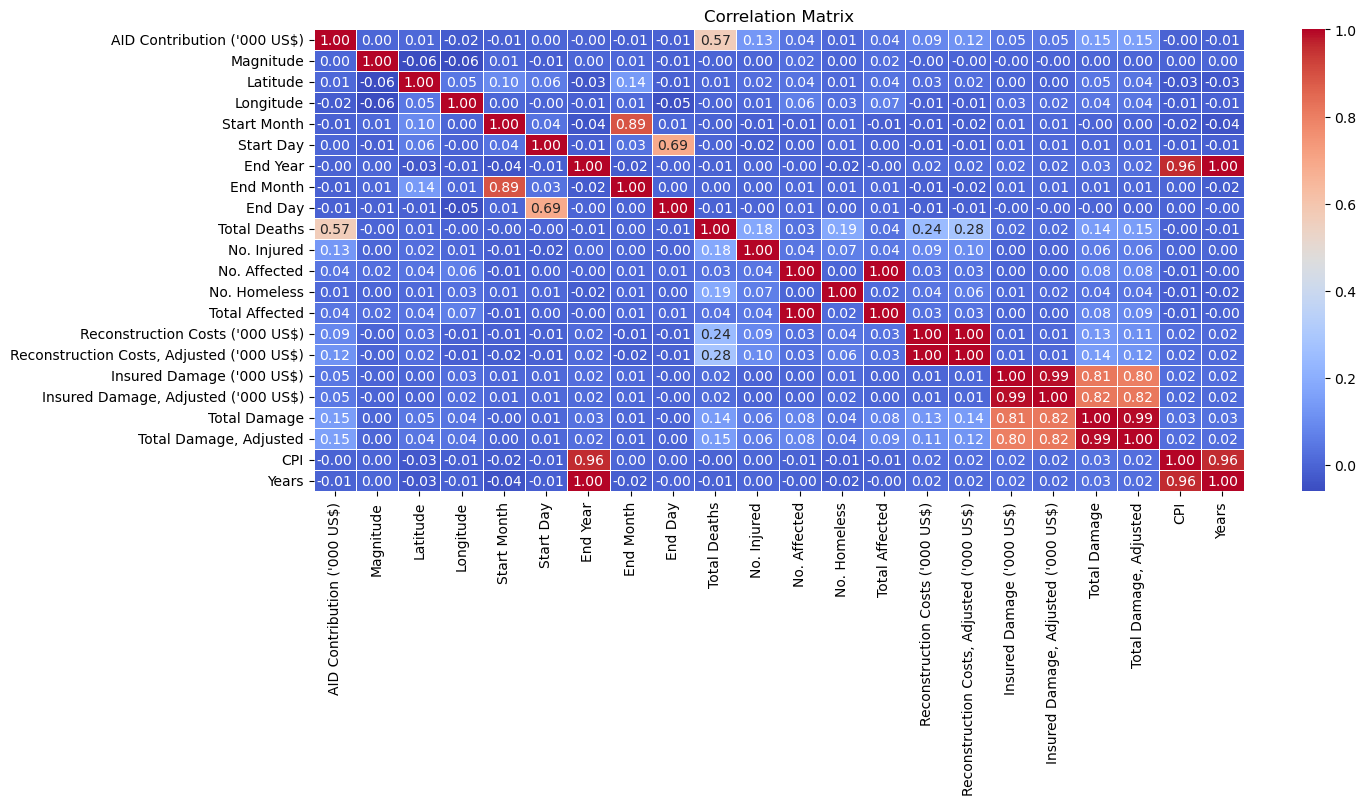

In [9]:
# Using only numeric data types
numeric_df = df.select_dtypes(include = ['number'])
# Creating the plot
plt.figure(figsize = (15,6))
sns.heatmap(numeric_df.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

In [10]:
# Observation
# 1. Total Death and AID Contribution has strong positive correlation. In this case it makes sense
# because Total Death would trigger help.
# 2. There is a strong positive correlation between the Start and End (Day, Month, Year), because most likely these Disasters
# would occur within a that timeline. For example Flood,Earthquake,and Storm would normally occur within days
# 3. I was hoping to see a strong correlation between Magnitude and Total Damage, but maybe the data that
# is provided is missing data or does not have the right data for it to show on the heatmap.

### Create a treemap using hierarchical columns you would like to explore

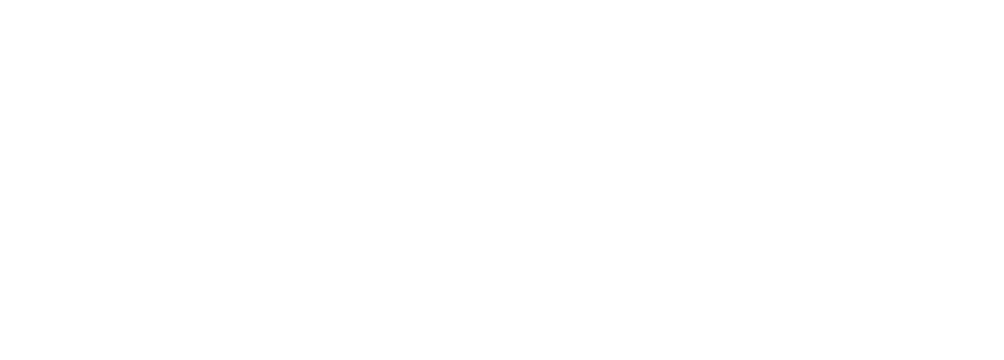

In [34]:
# Filtering and Creating a new dataframe
year_filter = df[df["Start Year"] == 2000]
# Choosing columns for the treemap
year_filter_grouped = year_filter.groupby(["Disaster Type", "Disaster Group", "Region"]).agg(Group_Count = pd.NamedAgg("Disaster Group", "size")).sort_values("Group_Count", ascending = False).reset_index(drop = False)
# Creating the Tree Map
treemap = px.treemap(year_filter_grouped, 
                     path = [px.Constant("All Groups"), "Disaster Group", "Disaster Type", "Region"],
                     values = "Group_Count")

treemap.update_traces(root_color = "darkgrey")
treemap.update_layout(
    treemapcolorway = ["lightblue", "lightgreen"],
    margin = dict(t = 50, l = 25, r = 25, b = 25),
    font_color = "white")
treemap.show()

### Create a stacked area chart of columns of your choosing

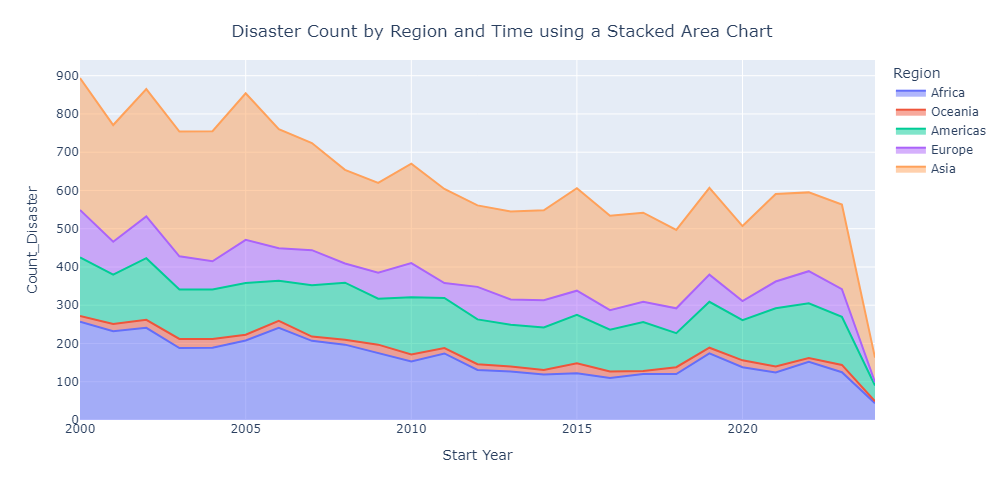

In [40]:
# Choosing columns for stacked area chart
region_and_disaster = df.groupby(['Region','Start Year']).agg(Count_Disaster = pd.NamedAgg('Country', 'size')).sort_values('Start Year').reset_index(drop = False)
#region_and_disaster.head(10)
# Creating Stacked Area Chart
area_chart = px.area(region_and_disaster, color = "Region", x = "Start Year", y = "Count_Disaster", line_group = "Region", width = 700, height = 500)
area_chart.update_layout(title = {"text": "Disaster Count by Region and Time using a Stacked Area Chart", "y": 0.95, "x": 0.5, "xanchor": "center", "yanchor": "top"})
area_chart.show()

In [41]:
# I notice that it shows the increase and decrease of y = Disaster Count Every Year in each country.